In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Selective catalytic Reduction

## Thermal model

In [2]:
# Konvekcija v cevi
D = 0.1 # m
L = 0.5 # m
A = np.pi * D * L # m^2

# hitrost zraka
v = 20 # m/s
c_p = 1000 # J/kgK
rho = 1.2 # kg/m^3
# izračun alpha iz hitrosti
alpha = v * c_p * rho # W/m^2K
alpha = 0.5 # W/m^2K

In [3]:
izpusni_plini = {
    "temperature": 633, # K
    "thermal_conductivity": 0.024, # W/m-K
    "kinematic_viscosity": 1.5e-5, # m^2/s
    "density": 1.2, # kg/m^3
    "velocity": 20, # m/s
    "specific_heat": 1000 # J/kgK
}

ohisje = {
    "inner_diameter": 0.04, # m
    "length": 1, # m
    "velocity": 10, # m/s
    "surface_temperature": 500 # K
}

okoliski_zrak = {
    "temperature": 293, # K
    "thermal_conductivity": 0.024, # W/m-K
    "kinematic_viscosity": 1.5e-5, # m^2/s
    "prandtl_number": 0.71,
    "density": 1.2, # kg/m^3
    "velocity": 20 # m/s
}

In [4]:
import numpy as np


izpusni_plini["dynamic_viscosity"] = izpusni_plini["kinematic_viscosity"] * izpusni_plini["density"]
izpusni_plini["Reynolds_number"] = izpusni_plini["density"] * izpusni_plini["velocity"] * ohisje["inner_diameter"] / izpusni_plini["dynamic_viscosity"]
izpusni_plini["Prandtl_number"] = izpusni_plini["dynamic_viscosity"] * izpusni_plini["specific_heat"] / izpusni_plini["thermal_conductivity"]

izpusni_plini["n"] = 0.4 # heating



print(f"Reynolds number: {izpusni_plini['Reynolds_number']:.2f}")
if izpusni_plini["Reynolds_number"] > 10000:
    izpusni_plini["Nusselt_number"] = 0.023 * izpusni_plini["Reynolds_number"]**(4/5) * izpusni_plini["Prandtl_number"]**izpusni_plini["n"]
    print("Turbulent flow")
else:
    izpusni_plini["Nusselt_number"] = 3.66
    print("Laminar flow")

izpusni_plini["h"] = izpusni_plini["Nusselt_number"] * izpusni_plini["thermal_conductivity"] / ohisje["inner_diameter"]
print(f'Nu: {izpusni_plini["Nusselt_number"]:.2f}')
print(f'Pr: {izpusni_plini["Prandtl_number"]:.2f}')



Reynolds number: 53333.33
Turbulent flow
Nu: 123.98
Pr: 0.75


1


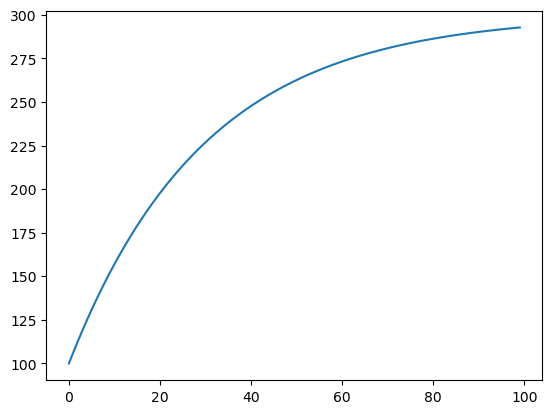

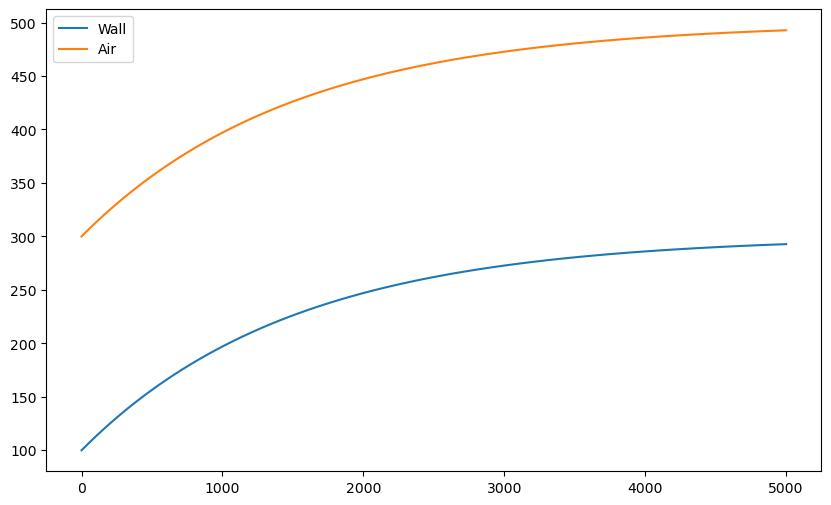

In [5]:
import math

# Define physical properties of fluids and materials
cp_air = 1005.0  # Specific heat of air at constant pressure, J/(kg*K)
rho_air = 1.2041  # Density of air at 20°C, kg/m^3
k_air = 0.0263  # Thermal conductivity of air at 20°C, W/(m*K)
mu_air = 1.81e-5  # Viscosity of air at 20°C, kg/(m*s)

# Define dimensions of the tube
d_inner = 0.1  # Inner diameter of tube, m
t_wall = 0.01  # Wall thickness of tube, m
L = 5.0  * 1000 # Length of tube, m

# Define flow conditions
T_air_in = 500.0  # Temperature of hot air inlet, K
T_air_surrounding = 300.0  # Temperature of surrounding air, K
v_air = 10.0  # Velocity of hot air, m/s

# Calculate Reynolds number
Re = rho_air * v_air * d_inner / mu_air

# Calculate Nusselt number
Nu = 0.023 * math.pow(Re, 0.8) * math.pow(k_air / d_inner, 0.4)

# Calculate convective heat transfer coefficient
h = Nu * k_air / d_inner

# Calculate thermal resistance of tube wall
Rt = math.log((d_inner + 2 * t_wall) / d_inner) / (2 * math.pi * k_air * L)

# Number ofpipe segments
N = 100

# Calculate temperature profile of hot air inside tube
T_air = [T_air_in - (T_air_in - T_air_surrounding) * math.exp(-h * math.pi * d_inner * x / (rho_air * v_air * cp_air)) for x in np.linspace(0, L, N)]

# Calculate temperature profile of tube wall
T_wall = [T_air_in - (T_air_in - T_air_surrounding) * math.exp(-h * math.pi * d_inner * x / (rho_air * v_air * cp_air)) - (T_air_in - T_air_surrounding) * math.exp(-Rt * math.pi * d_inner * x / (rho_air * v_air * cp_air)) for x in np.linspace(0, L, N)]

# Define specific times to evaluate temperature profiles
# t1 = 1  # Time in seconds
# t2 = 2  # Time in seconds
# t3 = 3  # Time in seconds

# Calculate distance traveled by hot air at specific times
x1 = 1 #m
x2 = 2 #m
x3 = 3 #m

print(x1)
plt.plot(T_wall)
int(N * x1 / L)
# np.linspace(0, L, N).shape
# Calculate temperature of inside wall, outside wall, and hot air at specific times
T_in_wall_1 = T_wall[int(N * x1 / L)]
T_out_wall_1 = T_air_surrounding + (T_wall[int(N * x1 / L)] - T_air_surrounding) / math.exp(-Rt * math.pi * d_inner * x1 / (rho_air * v_air * cp_air))
T_air_1 = T_air[int(N * x1 / L)]

T_in_wall_2 = T_wall[int(N * x2 / L)]
T_out_wall_2 = T_air_surrounding + (T_wall[int(N * x2 / L)] - T_air_surrounding) / math.exp(-Rt * math.pi * d_inner * x2 / (rho_air * v_air * cp_air))
T_air_2 = T_air[int(N * x2 / L)]

T_in_wall_3 = T_wall[int(N * x3 / L)]
T_out_wall_3 = T_air_surrounding + (T_wall[int(N * x3 / L)] - T_air_surrounding) / math.exp(-Rt * math.pi * d_inner * x3 / (rho_air * v_air * cp_air))
T_air_3 = T_air[int(N * x3 / L)]

T_in_wall_defined = np.array([T_in_wall_1, T_in_wall_2, T_in_wall_3])
T_out_wall_defined = np.array([T_out_wall_1, T_out_wall_2, T_out_wall_3])
T_air_defined = np.array([T_air_1, T_air_2, T_air_3])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.linspace(0, L, N), T_wall, label="Wall")
ax.plot(np.linspace(0, L, N), T_air, label="Air")
ax.legend()
# T_in_wall_2 = T_wall[int(x2 / L * len(T_wall))]
# T_out_wall_2 = T_air_surrounding + (T_wall[int(x2 / L * len(T_wall))] - T_air_surrounding) / math.exp(-Rt * math.pi * d_inner * x2 / (rho_air * v_air * cp_air))
# T_air_2 = T_air[int(x2 / L * len(T_air))]

# T_in_wall_3 = T_wall[int(x3 / L * len(T_wall))]
# T_out_wall_3 = T_air_surrounding + (T_wall[int(x3 / L * len(T_wall))] - T_air_surrounding) / math.exp(-Rt * math.pi * d_inner * x3 / (rho_air * v_air * cp_air))
# T_air_3 = T_air[int(x3 / L * len(T_air))]



In [6]:
import math

# Define physical properties of fluids and materials
cp_air = 1005.0  # Specific heat of air at constant pressure, J/(kg*K)
rho_air = 1.2041  # Density of air at 20°C, kg/m^3
k_air = 0.0263  # Thermal conductivity of air at 20°C, W/(m*K)
mu_air = 1.81e-5  # Viscosity of air at 20°C, kg/(m*s)

# Define dimensions of the tube
d_inner = 0.1  # Inner diameter of tube, m
t_wall = 0.01  # Wall thickness of tube, m
L = 5.0  * 1000 # Length of tube, m

# Define flow conditions
T_air_in = 500.0  # Temperature of hot air inlet, K
T_air_surrounding = 300.0  # Temperature of surrounding air, K
v_air = 10.0  # Velocity of hot air, m/s

# Calculate Reynolds number
Re = rho_air * v_air * d_inner / mu_air

# Calculate Nusselt number
Nu = 0.023 * math.pow(Re, 0.8) * math.pow(k_air / d_inner, 0.4)

# Calculate convective heat transfer coefficient
h = Nu * k_air / d_inner

# Calculate thermal resistance of tube wall
Rt = math.log((d_inner + 2 * t_wall) / d_inner) / (2 * math.pi * k_air * L)

# Number of pipe segments
N = 100

# Calculate temperature profile of hot air inside tube
x = np.linspace(0, L, N)  # array of distances along the tube
T_air = np.zeros_like(x)  # array of temperatures of air at each distance along the tube
T_air[0] = T_air_in  # set the initial temperature to be the inlet temperature
dx = L / (N-1)  # calculate the distance step size

# loop over each distance step
for i in range(1, N):
    # calculate the temperature of the air at this distance step
    T_air[i] = T_air[i-1] - ((T_air[i-1] - T_air_surrounding) * math.exp(-h * math.pi * d_inner * dx / (rho_air * v_air * cp_air))) - ((T_air[i-1] - T_air_surrounding) * (Rt * 2 * math.pi * d_inner * dx / (rho_air * v_air * cp_air)))


ValueError: x and y must have same first dimension, but have shapes (100,) and (199,)

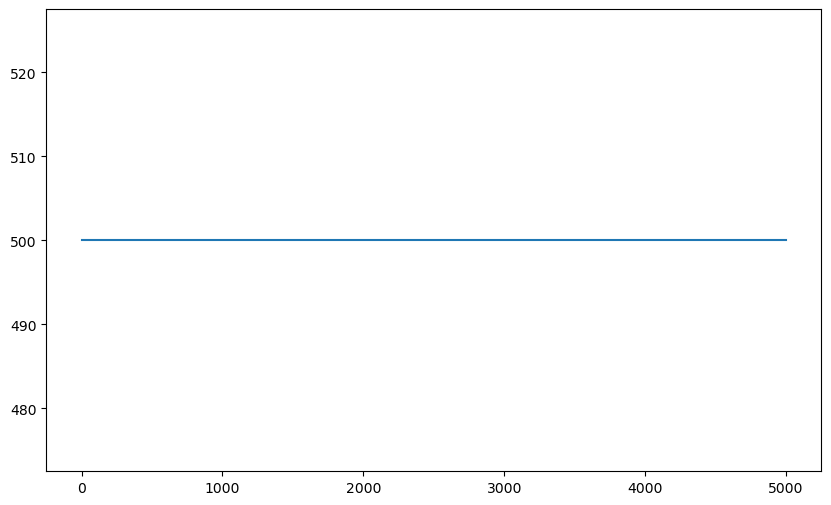

In [12]:
import math
import numpy as np

# Define physical properties of fluids and materials
cp_air = 1005.0  # Specific heat of air at constant pressure, J/(kg*K)
rho_air = 1.2041  # Density of air at 20°C, kg/m^3
k_air = 0.0263  # Thermal conductivity of air at 20°C, W/(m*K)
mu_air = 1.81e-5  # Viscosity of air at 20°C, kg/(m*s)

# Define dimensions of the tube
d_inner = 0.1  # Inner diameter of tube, m
t_wall = 0.001  # Wall thickness of tube, m
L = 5.0 * 1  # Length of tube, m
d_outer = d_inner + 2 * t_wall

# Define flow conditions
T_air_in = 500.0  # Temperature of hot air inlet, K
T_air_surrounding = 300.0  # Temperature of surrounding air, K
v_air = 20.0  # Velocity of hot air, m/s

# Calculate Reynolds number
Re = rho_air * v_air * d_inner / mu_air

# Calculate Nusselt number
Nu = 0.023 * math.pow(Re, 0.8) * math.pow(k_air / d_inner, 0.4)

# Calculate convective heat transfer coefficient
h = Nu * k_air / d_inner

# Calculate thermal resistance of tube wall
k_wall = 16.3  # Thermal conductivity of tube wall, W/(m*K)
Rt = math.log((d_inner + 2 * t_wall) / d_inner) / (2 * math.pi * k_wall * L)
rho_wall = 7850  # Density of tube wall, kg/m^3

# Number of pipe segments
N = 100

# Calculate temperature profile of hot air inside tube
T_air = [T_air_in]

for x in np.linspace(0, L, N)[1:]:
    dTdx = -(h * math.pi * d_inner * (T_air[-1] - T_inner[-1])) / (rho_air * v_air * cp_air)
    T_air.append(T_air[-1] + dTdx * (x - np.linspace(0, L, N)[0]))


T_inner = [T_air_in for x in np.linspace(0, L, N)]
T_outer = [T_air_in for x in np.linspace(0, L, N)]

for x in np.linspace(0, L, N)[1:]:
    dTdx = -(h * math.pi * d_inner * (T_air[-1] - T_inner[-1])) / (rho_air * v_air * cp_air)
    T_air.append(T_air[-1] + dTdx * (x - np.linspace(0, L, N)[0]))

for i in range(1, N):
    T_inner[i] = T_inner[i-1] - (h * math.pi * d_inner * (T_inner[i-1] - T_air[i-1])) / (2 * math.pi * k_wall * t_wall * rho_wall)
    
# T_wall_outer = np.array(T_wall_inner) + (T_air_surrounding - np.array(T_wall_inner)) #* math.exp(-h_w * math.pi * d_inner * x / (rho_wall * v_air * cp_wall))


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.linspace(0, L, N), T_inner, label="Wall:inner")
ax.plot(np.linspace(0, L, N), T_air, label="Air")
# ax.plot(np.linspace(0, L, N), T_wall_outer, label="Wall:outer")
ax.set_ylim(250, 600)
ax.legend()

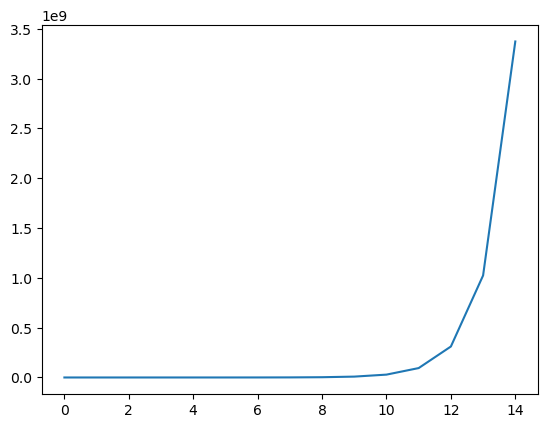

In [15]:
import math
import matplotlib.pyplot as plt

# Define physical properties of fluids and materials
cp_air = 1005.0  # Specific heat of air at constant pressure, J/(kg*K)
rho_air = 1.2041  # Density of air at 20°C, kg/m^3
k_air = 0.0263  # Thermal conductivity of air at 20°C, W/(m*K)
mu_air = 1.81e-5  # Viscosity of air at 20°C, kg/(m*s)
k_wall = 60.0  # Thermal conductivity of steel, W/(m*K)
rho_wall = 7800.0  # Density of steel, kg/m^3

# Define dimensions of the tube
d_inner = 0.1  # Inner diameter of tube, m
t_wall = 0.01  # Wall thickness of tube, m
L = 5.0  * 1000 # Length of tube, m
N = 100  # Number of pipe segments

# Define flow conditions
T_air_in = 500.0  # Temperature of hot air inlet, K
T_air_surrounding = 300.0  # Temperature of surrounding air, K
v_air = 10.0  # Velocity of hot air, m/s

# Calculate Reynolds number
Re = rho_air * v_air * d_inner / mu_air

# Calculate Nusselt number
Nu = 0.023 * math.pow(Re, 0.8) * math.pow(k_air / d_inner, 0.4)

# Calculate convective heat transfer coefficient
h = Nu * k_air / d_inner

# Calculate thermal resistance of tube wall
Rt = math.log((d_inner + 2 * t_wall) / d_inner) / (2 * math.pi * k_air * L)

# Calculate temperature profile of hot air inside tube
T_air = [T_air_in - (T_air_in - T_air_surrounding) * math.exp(-h * math.pi * d_inner * x / (rho_air * v_air * cp_air)) for x in np.linspace(0, L, N)]

# Initialize arrays to store temperature profiles
T_wall_inner = [0.0] * N
T_wall_outer = [0.0] * N

# Calculate temperature profile of inner wall
T_wall_inner[0] = T_air_in
for i in range(1, N):
    # Calculate heat transfer coefficient
    Re_wall = rho_air * v_air * (d_inner + 2 * t_wall) / mu_air
    Nu_wall = 0.023 * math.pow(Re_wall, 0.8) * math.pow(k_air / (d_inner + 2 * t_wall), 0.4)
    h_wall = Nu_wall * k_air / (d_inner + 2 * t_wall)
    
    # Calculate heat transfer rate and temperature difference
    q_dot = h_wall * math.pi * (d_inner + 2 * t_wall) * (T_wall_inner[i-1] - T_air[i])
    delta_T = q_dot / (2 * math.pi * k_wall * t_wall)
    
    # Update temperature of inner wall segment
    T_wall_inner[i] = T_wall_inner[i-1] + delta_T

# Calculate temperature profile of outer wall
# T_wall_outer[0] = T_air_in
# for i in range(1, N):
#     #
plt.plot(T_wall_inner[:15])	

### Test 1.5

In [24]:
# Geometry
L = 1 # m
D = 0.1 # m
t = 0.01 # m
d = D - 2 * t # m
# relative roughness
e = 0.001 # m
e_D = e / D # /

# Exhaus gases from a diesel car engine
rho_eg = 1.2 # kg/m^3
velocity_eg = 5 # m/s
kinematic_viscosity_eg = 1.5e-5 # m^2/s
dynamic_viscosity_eg = rho_eg * kinematic_viscosity_eg # kg/m*s
specific_heat_eg = 1000 # J/kgK
thermal_conductivity_eg = 0.024 # W/mK

Re_eg = velocity_eg * d / kinematic_viscosity_eg
Pr_eg = specific_heat_eg * dynamic_viscosity_eg / thermal_conductivity_eg
print(f"Reynolds number EG: {Re_eg:.2f}")

# Za turbulentni tok v cevi

# Za turbulentni tok v cevi Colebrook enačba
def colebrook_eq(f, e_D, Re):
    return 1/math.sqrt(f) + 2*math.log10((e_D)/3.7 + 2.51/(Re*math.sqrt(f)))

def colebrook_friction_factor(e_D, Re):
    f_guess = 0.01
    f_tol = 1e-6
    max_iterations = 1000
    iterations = 0
    error = 1
    while error > f_tol and iterations < max_iterations:
        f_next = f_guess - colebrook_eq(f_guess, e_D, Re)/(-0.5*f_guess**(-1.5) - (2.51/(Re*f_guess**(1.5)*((e_D)/3.7 + 2.51/(Re*math.sqrt(f_guess))))))
        error = abs(f_next - f_guess)
        f_guess = f_next
        iterations += 1
    return f_guess

def darcy_friction_factor(Re, e_D):
    if Re <= 2300:
        return 64/Re
    else:
        return colebrook_friction_factor(e_D, Re)

def alpha_coefficient(Re, Pr, D, e):
    f = darcy_friction_factor(Re_eg, e/D)
    Nu = 0.023*Re**(4/5)*Pr**(0.4)*(D/e)**(0.4)
    return f*(Nu/8)*(Re - 1000)*Pr/(1 + 12.7*math.sqrt(f/2)*(Pr**(2/3) - 1))


alpha = alpha_coefficient(Re_eg, Pr_eg, D, e)
print("alpha coefficient: ", alpha)

Reynolds number EG: 26666.67
alpha coefficient:  63078.634415067456


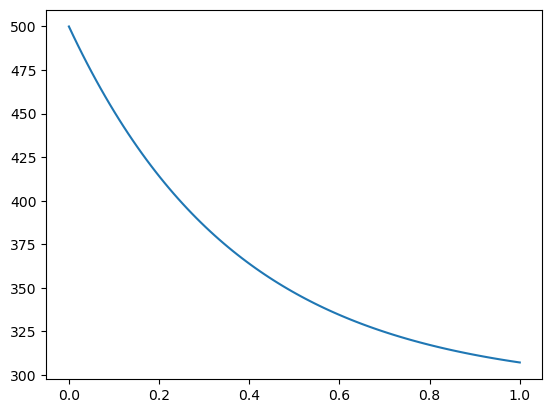

In [25]:
x = np.linspace(0, L, 100)
T = np.zeros_like(x)
T[0] = 500
dx = L / (len(x) - 1)
for i in range(1, len(x)):
    dTdx = -alpha * math.pi * d * (T[i-1] - 293) / (rho_eg * velocity_eg * specific_heat_eg)
    T[i] = T[i-1] + dTdx * dx
plt.plot(x, T)

## Test 2

In [ ]:
# # Calculate Reynolds number
# density = 1.225 # kg/m^3 (at 293 K)
# velocity = ohisje["velocity"]
# inner_diameter = ohisje["inner_diameter"]
# dynamic_viscosity = density * izpusni_plini["kinematic_viscosity"]
# reynolds_number = density * velocity * inner_diameter / dynamic_viscosity

# # Calculate Nusselt number
# prandtl_number = izpusni_plini["prandtl_number"]
# thermal_conductivity = izpusni_plini["thermal_conductivity"]
# diameter_ratio = 1 # assuming fully developed flow
# nusselt_number = (0.023 * reynolds_number**(4/5) * prandtl_number**(1/3) *
#                   (diameter_ratio**(-2/5)) * (thermal_conductivity / inner_diameter))

# # Calculate convective heat transfer coefficient
# k = ohisje["surface_temperature"] - izpusni_plini["temperature"]
# h = nusselt_number * thermal_conductivity / inner_diameter

# # Calculate heat transfer rate
# area = np.pi * inner_diameter * ohisje["length"]
# q_conv = h * area * k

# print(f"The convective heat transfer coefficient is {h:.2f} W/m^2-K")
# print(f"The heat transfer rate is {q_conv:.2f} W")

In [2]:
import math
import numpy as np

# Define physical properties of fluids and materials
cp_air = 1005.0  # Specific heat of air at constant pressure, J/(kg*K)
rho_air = 1.2041  # Density of air at 20°C, kg/m^3
k_air = 0.0263  # Thermal conductivity of air at 20°C, W/(m*K)
mu_air = 1.81e-5  # Viscosity of air at 20°C, kg/(m*s)
cp_steel = 500.0  # Specific heat of steel at constant pressure, J/(kg*K)
rho_steel = 7850.0  # Density of steel, kg/m^3
k_steel = 16.3  # Thermal conductivity of steel at 20°C, W/(m*K)

# Define dimensions of the tube
d_inner = 0.1  # Inner diameter of tube, m
t_wall = 0.01  # Wall thickness of tube, m
L = 1.0  # Length of tube, m

# Define flow conditions
T_air_in = 500.0  # Temperature of hot air inlet, K
T_air_surrounding = 300.0  # Temperature of surrounding air, K
v_air = 10.0  # Velocity of hot air, m/s
alpha = 0.5  # Heat transfer coefficient for heat transfer to surrounding air, W/(m^2*K)

# Calculate Reynolds number
Re = rho_air * v_air * d_inner / mu_air

# Calculate Nusselt number
Nu = 0.023 * math.pow(Re, 0.8) * math.pow(k_air / d_inner, 0.4)

# Calculate convective heat transfer coefficient
h = Nu * k_air / d_inner

# Calculate thermal resistance of tube wall
Rt = math.log((d_inner + 2 * t_wall) / d_inner) / (2 * math.pi * k_air * L)

# Number of pipe segments
N = 100

# Calculate temperature profile of hot air inside tube
T_air = [T_air_in - (T_air_in - T_air_surrounding) * math.exp(-h * math.pi * d_inner * x / (rho_air * v_air * cp_air)) for x in np.linspace(0, L, N)]

# Calculate temperature profile of tube wall
T_wall = [T_air[0]]  # Initialize with inner wall temperature
for i in range(1, N):
    # Calculate heat transfer from air to wall
    Q = h * math.pi * d_inner * (T_air[i-1] - T_wall[i-1])
    # Calculate heat flow through wall
    Q_wall = Q * alpha
    # Calculate change in wall temperature
    dT_wall = Q_wall / (2 * math.pi * k_steel * (d_inner/N) * t_wall)
    # Calculate new wall temperature
    T_wall_i = T_wall[i-1] + dT_wall
    # Add new wall temperature to list
    T_wall.append(T_wall_i)

# Add outer wall temperature to list
T_wall.append(T_wall[-1] - (T_air_in - T_air_surrounding) * math.exp(-alpha * math.pi * (d_inner/N) * L / (rho_steel * cp_steel)))

# Print wall temperatures for each subsection
for i in range(0, N+1):
    print(f"Wall temperature at subsection {i} is {T_wall[i]:.2f} K")


Wall temperature at subsection 0 is 300.00 K
Wall temperature at subsection 1 is 300.00 K
Wall temperature at subsection 2 is 305.27 K
Wall temperature at subsection 3 is -20356.01 K
Wall temperature at subsection 4 is 81048132.39 K
Wall temperature at subsection 5 is -318006653123.17 K
Wall temperature at subsection 6 is 1247759855394963.50 K
Wall temperature at subsection 7 is -4895824159574181888.00 K
Wall temperature at subsection 8 is 19209701368288428163072.00 K
Wall temperature at subsection 9 is -75372933061165639738064896.00 K
Wall temperature at subsection 10 is 295740101801964513296700669952.00 K
Wall temperature at subsection 11 is -1160392786398005217484018655690752.00 K
Wall temperature at subsection 12 is 4553022774118698200715704532966834176.00 K
Wall temperature at subsection 13 is -17864654645080926509010325223151534866432.00 K
Wall temperature at subsection 14 is 70095385290442951056027401584823795609239552.00 K
Wall temperature at subsection 15 is -27503263492241936

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define physical properties of fluids and materials
cp_air = 1005.0  # Specific heat of air at constant pressure, J/(kg*K)
rho_air = 1.2041  # Density of air at 20°C, kg/m^3
k_air = 0.0263  # Thermal conductivity of air at 20°C, W/(m*K)
mu_air = 1.81e-5  # Viscosity of air at 20°C, kg/(m*s)
alpha = 100.0  # Heat transfer coefficient of surrounding air, W/(m^2*K)
T_surrounding = 300.0  # Temperature of surrounding air, K

# Define dimensions of the surface
L = 1.0  # Length of surface, m
N = 100  # Number of subsections
dx = L/N  # Length of each subsection

# Define flow conditions
T_air_in = 500.0  # Temperature of hot air inlet, K
v_air = 10.0  # Velocity of hot air, m/s

k_wall = 16.3  # Thermal conductivity of tube wall, W/(m*K)
t_wall = 0.01  # Wall thickness of tube, m
rho_wall = 7850  # Density of tube wall, kg/m^3

# Calculate Reynolds number
d_inner = 0.1  # Inner diameter of tube, m
Re = rho_air * v_air * d_inner / mu_air

# Calculate Nusselt number
Nu = 0.023 * math.pow(Re, 0.8) * math.pow(k_air / d_inner, 0.4)

# Calculate convective heat transfer coefficient
h = Nu * k_air / d_inner

# Calculate thermal resistance of tube wall
d_outer = d_inner + 2*t_wall  # Outer diameter of tube, m
Rt = math.log(d_outer/d_inner) / (2 * math.pi * k_wall * L)

# Initialize arrays to store results
T_wall = np.zeros(N)  # Wall temperature for each subsection
T_air = np.zeros(N)  # Air temperature for each subsection

# Calculate temperature profile of hot air and wall temperature for each subsection
for i in range(N):
    # Calculate temperature of air at current subsection
    x = i * dx
    T_air[i] = T_air_in - (T_air_in - T_surrounding) * math.exp(-h * d_inner * x / (rho_air * v_air * cp_air))
    
    # Calculate temperature of wall at current subsection
    Q_dot = alpha * (T_air[i] - T_wall[i]) * dx  # Heat transfer rate per unit length of surface
    T_wall[i] = T_wall[i-1] + Q_dot * dx / (k_wall * math.pi * d_inner)

# # Plot temperature profile of wall
# x_values = np.linspace(0, L, N)
# plt.plot(x_values, T_wall)
# plt.xlabel('Length (m)')
# plt.ylabel('Wall temperature (K)')
# plt.show()
print(f'h = {h:.2f} W/m^2-K')


h = 25.59 W/m^2-K


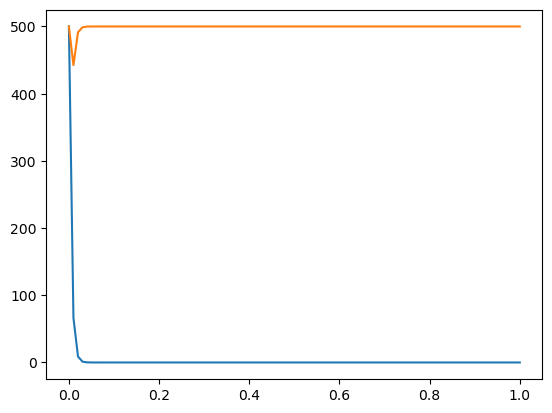

In [9]:
# Define the number of points to calculate the temperature profile
N = 100

# Define the average parameters
h_gas = 100 # W/m^2*K
h_air = 25 # W/m^2*K
k_wall = 50 # W/m*K
t_wall = 0.01 # meters

# Define the initial temperature of the exhaust gases entering the pipe
T_gas_in = 500 # K

# Define the temperature of the surrounding air
T_air = 300 # K

# Calculate the temperature profile lengthwise for the exhaust gases passing through the pipe
x = np.linspace(0, L, N)
T_gas = np.zeros(N)
T_wall = np.zeros(N)
T_air_gap = np.zeros(N)
T_outer_wall = np.zeros(N)

for i in range(N):
    # Calculate the temperature of the exhaust gases at each point along the pipe
    T_gas[i] = T_gas_in * np.exp(-h_gas * x[i] / (k_wall * t_wall))
    
    # Calculate the temperature of the inner wall of the pipe at each point along the pipe
    T_wall[i] = T_gas_in - (T_gas_in - T_gas[i]) * np.exp(-h_gas * x[i] / (k_wall * t_wall))
plt.plot(x, T_gas, label='Gas')
plt.plot(x, T_wall, label='Wall')